## Week 8 Homework

---

In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

---

### First Part: Posterior Distribution of \\(\boldsymbol{\beta}\\)

We consider the linear regression model:

\\[
\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2 
\;\sim\; 
\mathcal{N}\bigl(\mathbf{X}\,\boldsymbol{\beta}, \,\sigma^2 \mathbf{I}\bigr).
\\]

- \\(\mathbf{y}\\) is an \\(n\\)-vector of responses,
- \\(\mathbf{X}\\) is an \\(n \times p\\) design matrix,
- \\(\boldsymbol{\beta}\\) is a \\(p\\)-vector of unknown coefficients,
- \\(\sigma^2\\) is the noise variance,
- \\(\mathbf{I}\\) is the \\(n \times n\\) identity matrix.

Assume a **multivariate normal** prior on \\(\boldsymbol{\beta}\\):

\\[
\boldsymbol{\beta} \;\sim\; 
\mathcal{N}\!\bigl(\boldsymbol{\beta}_0,\;\boldsymbol{\Sigma}_\beta\bigr).
\\]

#### Likelihood \\(\times\\) Prior

1. **Likelihood** (ignoring constants in \\(\boldsymbol{\beta}\\)):

\\[
p(\mathbf{y} \mid \boldsymbol{\beta}, \sigma^2)
\;\propto\;
\exp \!\Bigl(
-\tfrac12 (\mathbf{y} - \mathbf{X}\,\boldsymbol{\beta})^\top \bigl(\tfrac{1}{\sigma^2}\,\mathbf{I}\bigr)\,(\mathbf{y} - \mathbf{X}\,\boldsymbol{\beta})
\Bigr).
\\]

2. **Prior**:

\\[
p(\boldsymbol{\beta})
\;\propto\;
\exp \!\Bigl(
-\tfrac12 (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top 
\boldsymbol{\Sigma}_{\beta}^{-1} 
(\boldsymbol{\beta} - \boldsymbol{\beta}_0)
\Bigr).
\\]

Thus, the **posterior** is proportional to the product of these exponentials:

\\[
p(\boldsymbol{\beta}\mid \mathbf{y}, \mathbf{X}, \sigma^2) 
\;\propto\; 
\exp \!\Bigl(
-\tfrac12 (\mathbf{y} - \mathbf{X}\,\boldsymbol{\beta})^\top \bigl(\tfrac{1}{\sigma^2}\,\mathbf{I}\bigr)\,(\mathbf{y} - \mathbf{X}\,\boldsymbol{\beta})
\Bigr)
\;\times\;
\exp \!\Bigl(
-\tfrac12 (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top 
\boldsymbol{\Sigma}_{\beta}^{-1} 
(\boldsymbol{\beta} - \boldsymbol{\beta}_0)
\Bigr).
\\]

##### Posterior is Gaussian

By collecting the quadratic forms in \\(\boldsymbol{\beta}\\), we find the posterior is also **multivariate normal**:

\\[
\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2 
\;\sim\;
\mathcal{N}\!\bigl(\boldsymbol{\mu}_n,\;\boldsymbol{\Sigma}_n\bigr),
\\]

where

\\[
\boldsymbol{\Sigma}_n 
= 
\bigl(
\boldsymbol{\Sigma}_\beta^{-1} 
\;+\; 
\tfrac{1}{\sigma^2}\,\mathbf{X}^\top \mathbf{X}
\bigr)^{-1},
\quad
\boldsymbol{\mu}_n 
= 
\boldsymbol{\Sigma}_n 
\Bigl(
\boldsymbol{\Sigma}_\beta^{-1}\,\boldsymbol{\beta}_0 
\;+\; 
\tfrac{1}{\sigma^2}\,\mathbf{X}^\top \mathbf{y}
\Bigr).
\\]

Putting it in a standard formula:

\\[
\boxed{
p(\boldsymbol{\beta} \mid \mathbf{y}, \mathbf{X}, \sigma^2)
= \mathcal{N}\!\Bigl(\boldsymbol{\mu}_n,\;\boldsymbol{\Sigma}_n\Bigr),
\quad
\boldsymbol{\Sigma}_n 
= 
\Bigl(
\boldsymbol{\Sigma}_\beta^{-1} 
+ 
\tfrac{1}{\sigma^2}\mathbf{X}^\top \mathbf{X}
\Bigr)^{-1},
\quad
\boldsymbol{\mu}_n
=
\boldsymbol{\Sigma}_n 
\Bigl(
\boldsymbol{\Sigma}_\beta^{-1}\,\boldsymbol{\beta}_0
+ 
\tfrac{1}{\sigma^2}\,\mathbf{X}^\top \mathbf{y}
\Bigr).
}
\\]


### Second Part: Posterior Distribution of \\(\sigma^2\\)

Now assume \\(\sigma^2\\) itself has an **inverse-gamma** prior:

\\[
\sigma^2 \;\sim\; \text{IG}\bigl(\alpha^*,\,\beta^*\bigr).
\\]

An inverse-gamma distribution with shape \\(\alpha\\) and scale \\(\beta\\) has PDF:

\\[
p(\sigma^2) = 
\frac{\beta^\alpha}{\Gamma(\alpha)}
(\sigma^2)^{-\alpha-1} \exp\!\Bigl(-\tfrac{\beta}{\sigma^2}\Bigr), 
\quad \sigma^2 > 0.
\\]

When combined with the Gaussian likelihood of linear regression, the posterior for \\(\sigma^2\\) remains **inverse-gamma**. In particular, if we consider the sum of squared residuals (or an equivalent quantity from the model fit), the posterior for \\(\sigma^2\\) is:

\\[
\sigma^2 \mid \mathbf{y}, \mathbf{X}
\;\sim\;
\text{IG}\Bigl(
\alpha^* + \tfrac{n}{2},\;\;
\beta^* + \tfrac{1}{2}(\mathbf{y} - \mathbf{X}\,\hat{\boldsymbol{\beta}})^\top
(\mathbf{y} - \mathbf{X}\,\hat{\boldsymbol{\beta}})
\Bigr),
\\]

where \\(n\\) is the number of observations, and \\(\hat{\boldsymbol{\beta}}\\) typically represents either the OLS or the posterior mean estimate of \\(\boldsymbol{\beta}\\), depending on the derivation.

Thus:

\\[
\boxed{
p(\sigma^2 \mid \mathbf{y}, \mathbf{X})
= \text{IG}\!\Bigl(
\alpha^* \;+\; \frac{n}{2}, \;
\beta^* \;+\; \tfrac12 (\mathbf{y}-\mathbf{X}\,\hat{\boldsymbol{\beta}})^\top 
(\mathbf{y}-\mathbf{X}\,\hat{\boldsymbol{\beta}})
\Bigr).
}
\\]


#### [Optional] Q1 Extra: derive the following

Show that for $s_i=1$ and **hyperparameters** $b_i=0$ (ignoring normalizing proportionality constants) the log posterior distributions for $\beta$ using either **normal** or **Laplace** prior distributions have analagous forms to the **ridge** and **lasso** loss functions.

*Note though that Bayesians do not optimize posterior distributions, they sample from them; but, nonetheless, the posterior distributions serve to provided 'regularizeations' of the likelihood through the prior.*

---

#### 1. Setup and Notation

1. **Likelihood** (simplified):
   \\[
   p(\mathbf{y} \mid \boldsymbol{\beta}) 
   \;\propto\; 
   \exp\!\Bigl(-\tfrac12\,\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2\Bigr).
   \\]
   - Here, we omit constants that do not depend on \\(\boldsymbol{\beta}\\).
   - This is the usual Gaussian likelihood for linear regression with noise variance 1 (or viewed up to a scaling factor).

2. **Prior** on each component \\(\beta_i\\):
   - Let the hyperparameters be \\(b_i = 0\\) and \\(s_i = 1\\), meaning each \\(\beta_i\\) has prior mean 0 and scale 1 (details differ for Normal vs. Laplace).

##### Posterior (Ignoring Normalizing Constants)

In general, 
\\[
\log p(\boldsymbol{\beta} \mid \mathbf{y}) 
\;\;=\;\; 
\log p(\mathbf{y} \mid \boldsymbol{\beta}) \;+\; \log p(\boldsymbol{\beta}).
\\]
We now examine how the choice of prior yields different regularization terms in the **log** domain.

---

#### 2. Normal Prior \\(\implies\\) Ridge Penalty

1. **Normal (Gaussian) Prior**:

   \\[
   \beta_i \;\sim\; \mathcal{N}(0,\;1)
   \quad\Longrightarrow\quad
   p(\beta_i) 
   \;\propto\; 
   \exp\!\Bigl( -\tfrac12\,\beta_i^2 \Bigr).
   \\]

2. **Log of the Prior**:

   \\[
   \log p(\beta_i) 
   \;\propto\; 
   -\tfrac12\,\beta_i^2.
   \\]

3. **Summed over all \\(\beta_i\\)**:

   \\[
   \log p(\boldsymbol{\beta})
   \;\propto\; 
   -\tfrac12 \sum_i \beta_i^2.
   \\]

4. **Log-Posterior** (up to a constant) becomes:

   \\[
   \log p(\boldsymbol{\beta} \mid \mathbf{y}) 
   \;\propto\;
   -\tfrac12 \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 
   \;-\;
   \tfrac12 \sum_i \beta_i^2.
   \\]

If one *maximizes* this w.r.t. \\(\boldsymbol{\beta}\\), it is equivalent to 
**minimizing** 
\\[
\tfrac12 \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 
\;+\;
\tfrac12 \sum_i \beta_i^2,
\\]
which is precisely the **ridge regression** criterion.

Hence a **normal prior** on \\(\beta_i\\) with mean \\(0\\) and variance \\(1\\) corresponds to a **ridge** penalty (\\(\ell_2\\)-penalty) in the log-posterior.

---

#### 3. Laplace Prior \\(\implies\\) Lasso Penalty

1. **Laplace Prior** (double-exponential with mean 0, scale 1):

   \\[
   \beta_i 
   \;\sim\; 
   \text{Laplace}\bigl(0,\,1\bigr)
   \quad\Longrightarrow\quad
   p(\beta_i)
   \;\propto\; 
   \exp\!\bigl(-|\beta_i|\bigr).
   \\]

2. **Log of the Prior**:

   \\[
   \log p(\beta_i)
   \;\propto\;
   -|\beta_i|.
   \\]

3. **Summed over all \\(\beta_i\\)**:

   \\[
   \log p(\boldsymbol{\beta})
   \;\propto\;
   -\sum_i |\beta_i|.
   \\]

4. **Log-Posterior** (up to a constant) becomes:

   \\[
   \log p(\boldsymbol{\beta} \mid \mathbf{y})
   \;\propto\;
   -\tfrac12 \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 
   \;-\;
   \sum_i |\beta_i|.
   \\]

Maximizing this w.r.t. \\(\boldsymbol{\beta}\\) **minimizes** 
\\[
\tfrac12 \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 
\;+\;
\sum_i |\beta_i|,
\\]
which is the **lasso** criterion (\\(\ell_1\\)-penalty).

Thus, a **Laplace prior** on \\(\beta_i\\) leads directly to a **lasso** penalty in the log-posterior.


### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma` 
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

---

In [2]:
# Load the dataset
data = pd.read_csv('song_data.csv').dropna()

# Display the first few rows of the dataframe to understand its structure
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Use IQR to treat outliers if the normality is not fulfilled so that z-score method cannot be used
# Calculate IQR for each numerical column and determine outlier boundaries
Q1 = data[numerical_cols].quantile(0.01)
Q99 = data[numerical_cols].quantile(0.99)
IQR = Q99 - Q1

# Determine outlier boundaries
lower_bound = Q1
upper_bound = Q99

# Identify outliers
outliers = (data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)

# Remove outliers from the dataset
data = data[~outliers.any(axis=1)]
data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
# Step 4: Normalize/Scale Data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

# Combine scaled numerical data with non-numerical data
data_final = pd.concat([data.drop(columns=numerical_cols).reset_index(drop=True), data_scaled], axis=1)

data_final.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,0.768421,0.508666,0.005597,0.374821,0.671263,0.000031,0.727273,0.028575,0.901324,1.0,0.007870,0.788501,0.5,0.460913
1,In The End,0.694737,0.361886,0.010475,0.440629,0.859901,0.000000,0.272727,0.097691,0.784029,0.0,0.055093,0.286523,0.5,0.346728
2,Seven Nation Army,0.800000,0.409735,0.008302,0.719599,0.429675,0.478587,0.000000,0.304617,0.711937,1.0,0.123148,0.437797,0.5,0.296223
3,By The Way,0.778947,0.361886,0.026904,0.310443,0.988969,0.003801,0.000000,0.089245,0.858556,1.0,0.187500,0.426126,0.5,0.157883
4,How You Remind Me,0.589474,0.384171,0.000938,0.304721,0.763927,0.000000,0.909091,0.104730,0.852113,1.0,0.012269,0.828713,0.5,0.570707


In [5]:
data_final.shape

(15939, 15)

In [6]:
# X = data[["danceability", "energy", "liveness"]].values
X = data_final.drop(columns=["song_name", "song_popularity"]).values
# X_with_intercept = np.column_stack([np.zeros(len(X)), X])
y = data_final["song_popularity"].values

# Too many observations which gear down the process
# Randomly select 5000 indices from the dataset
random_indices = np.random.choice(X.shape[0], 100, replace=False)

# Subset X and y based on the selected indices
X_reduced = X[random_indices]
y_reduced = y[random_indices]

# Verify the new shapes
X_reduced.shape, y_reduced.shape

((100, 13), (100,))

In [85]:
# X = data.drop(columns=["song_name", "song_popularity"]).values
# y = data["song_popularity"].values
p = X_reduced.shape[1]
n = X_reduced.shape[0]

with pm.Model() as LR:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    sigma = pm.TruncatedNormal('sigma', mu=1, sigma=1, lower=0) # it's just a half normal, actually
    y = pm.Normal('y', mu=X_reduced@betas, sigma=sigma, observed=y_reduced)
    
with LR:
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 181 seconds.


In [86]:
az.summary(idata, round_to=5, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.22580,0.11290,0.01285,0.45931,0.00172,0.00178,4295.28320,2894.93675,1.00258
betas[1],-0.12145,0.06758,-0.25137,0.02014,0.00122,0.00104,3046.48313,2765.83510,1.00004
betas[2],-0.00232,0.10910,-0.20076,0.21901,0.00200,0.00156,2971.33275,2999.12298,1.00077
betas[3],-0.50749,0.16701,-0.84730,-0.19004,0.00348,0.00240,2297.35086,2383.63078,1.00015
betas[4],-0.07812,0.12029,-0.30540,0.16565,0.00202,0.00191,3541.06579,2879.57039,1.00204
betas[5],-0.04830,0.05973,-0.16402,0.07091,0.00099,0.00087,3606.31046,3061.97823,1.00073
betas[6],0.13854,0.12452,-0.09740,0.38803,0.00198,0.00191,3942.42359,2972.43845,1.00080
betas[7],0.47081,0.20608,0.07912,0.90303,0.00433,0.00315,2262.44993,2449.41228,1.00154
betas[8],0.06110,0.04591,-0.02515,0.15535,0.00067,0.00074,4715.33456,3104.52341,0.99994
betas[9],0.05142,0.11183,-0.16625,0.26579,0.00184,0.00162,3693.14775,2970.63179,1.00060


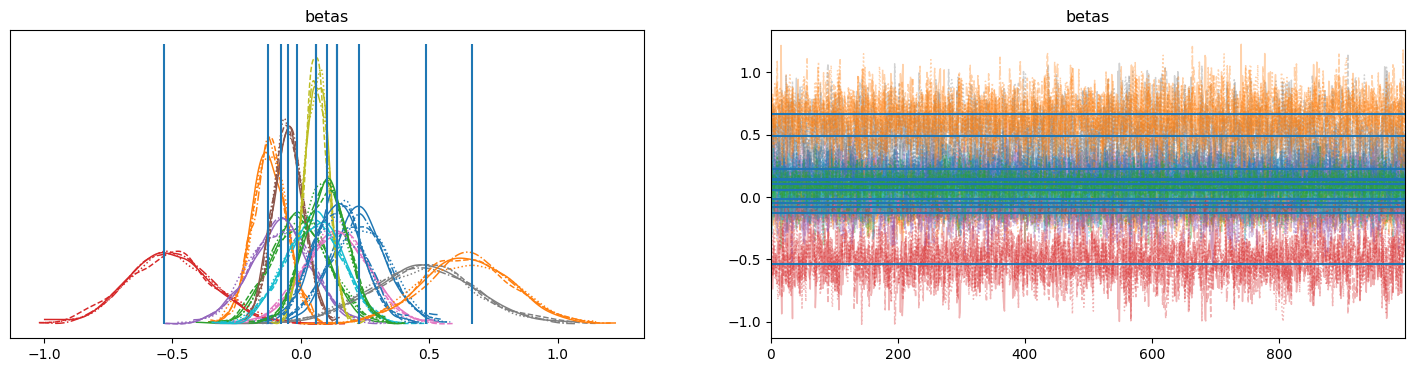

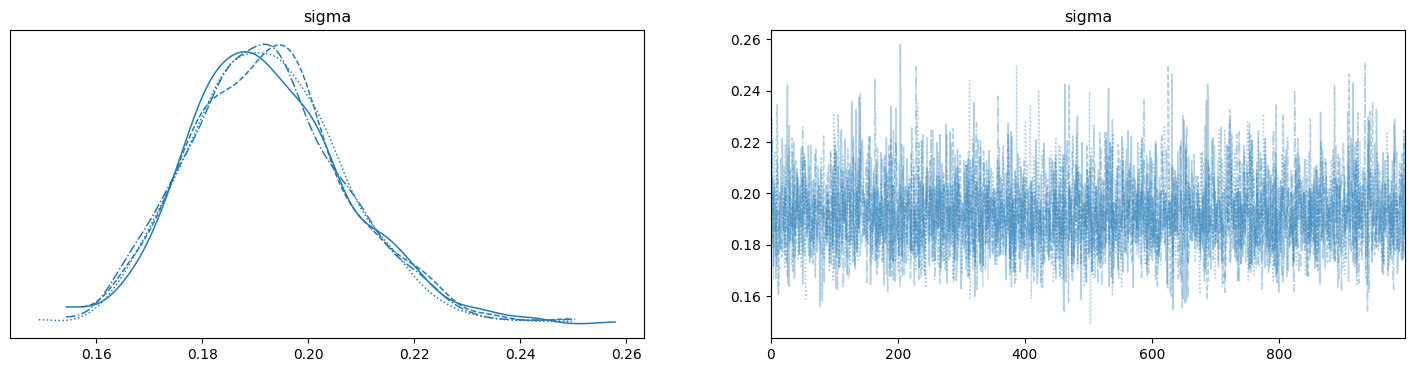

In [87]:
fig,ax = plt.subplots(1,2,figsize=(18,4))
fig2,ax2 = plt.subplots(1,2,figsize=(18,4))
az.plot_trace(idata, axes=np.r_[ax[0],ax[1],ax2[0],ax2[1]].reshape(2,2))

ax[0].vlines(np.linalg.inv(X_reduced.T.dot(X_reduced)).dot(X_reduced.T.dot(y_reduced))[:13], ymin=0, ymax=ax[0].get_ylim()[-1])
ax[1].hlines(np.linalg.inv(X_reduced.T.dot(X_reduced)).dot(X_reduced.T.dot(y_reduced))[:13], xmin=0, xmax=ax[1].get_xlim()[-1]);

array([[<Axes: title={'center': 'betas\n0'}>,
        <Axes: title={'center': 'betas\n1'}>,
        <Axes: title={'center': 'betas\n2'}>,
        <Axes: title={'center': 'betas\n3'}>],
       [<Axes: title={'center': 'betas\n4'}>,
        <Axes: title={'center': 'betas\n5'}>,
        <Axes: title={'center': 'betas\n6'}>,
        <Axes: title={'center': 'betas\n7'}>],
       [<Axes: title={'center': 'betas\n8'}>,
        <Axes: title={'center': 'betas\n9'}>,
        <Axes: title={'center': 'betas\n10'}>,
        <Axes: title={'center': 'betas\n11'}>],
       [<Axes: title={'center': 'betas\n12'}>,
        <Axes: title={'center': 'sigma'}>, <Axes: >, <Axes: >]],
      dtype=object)

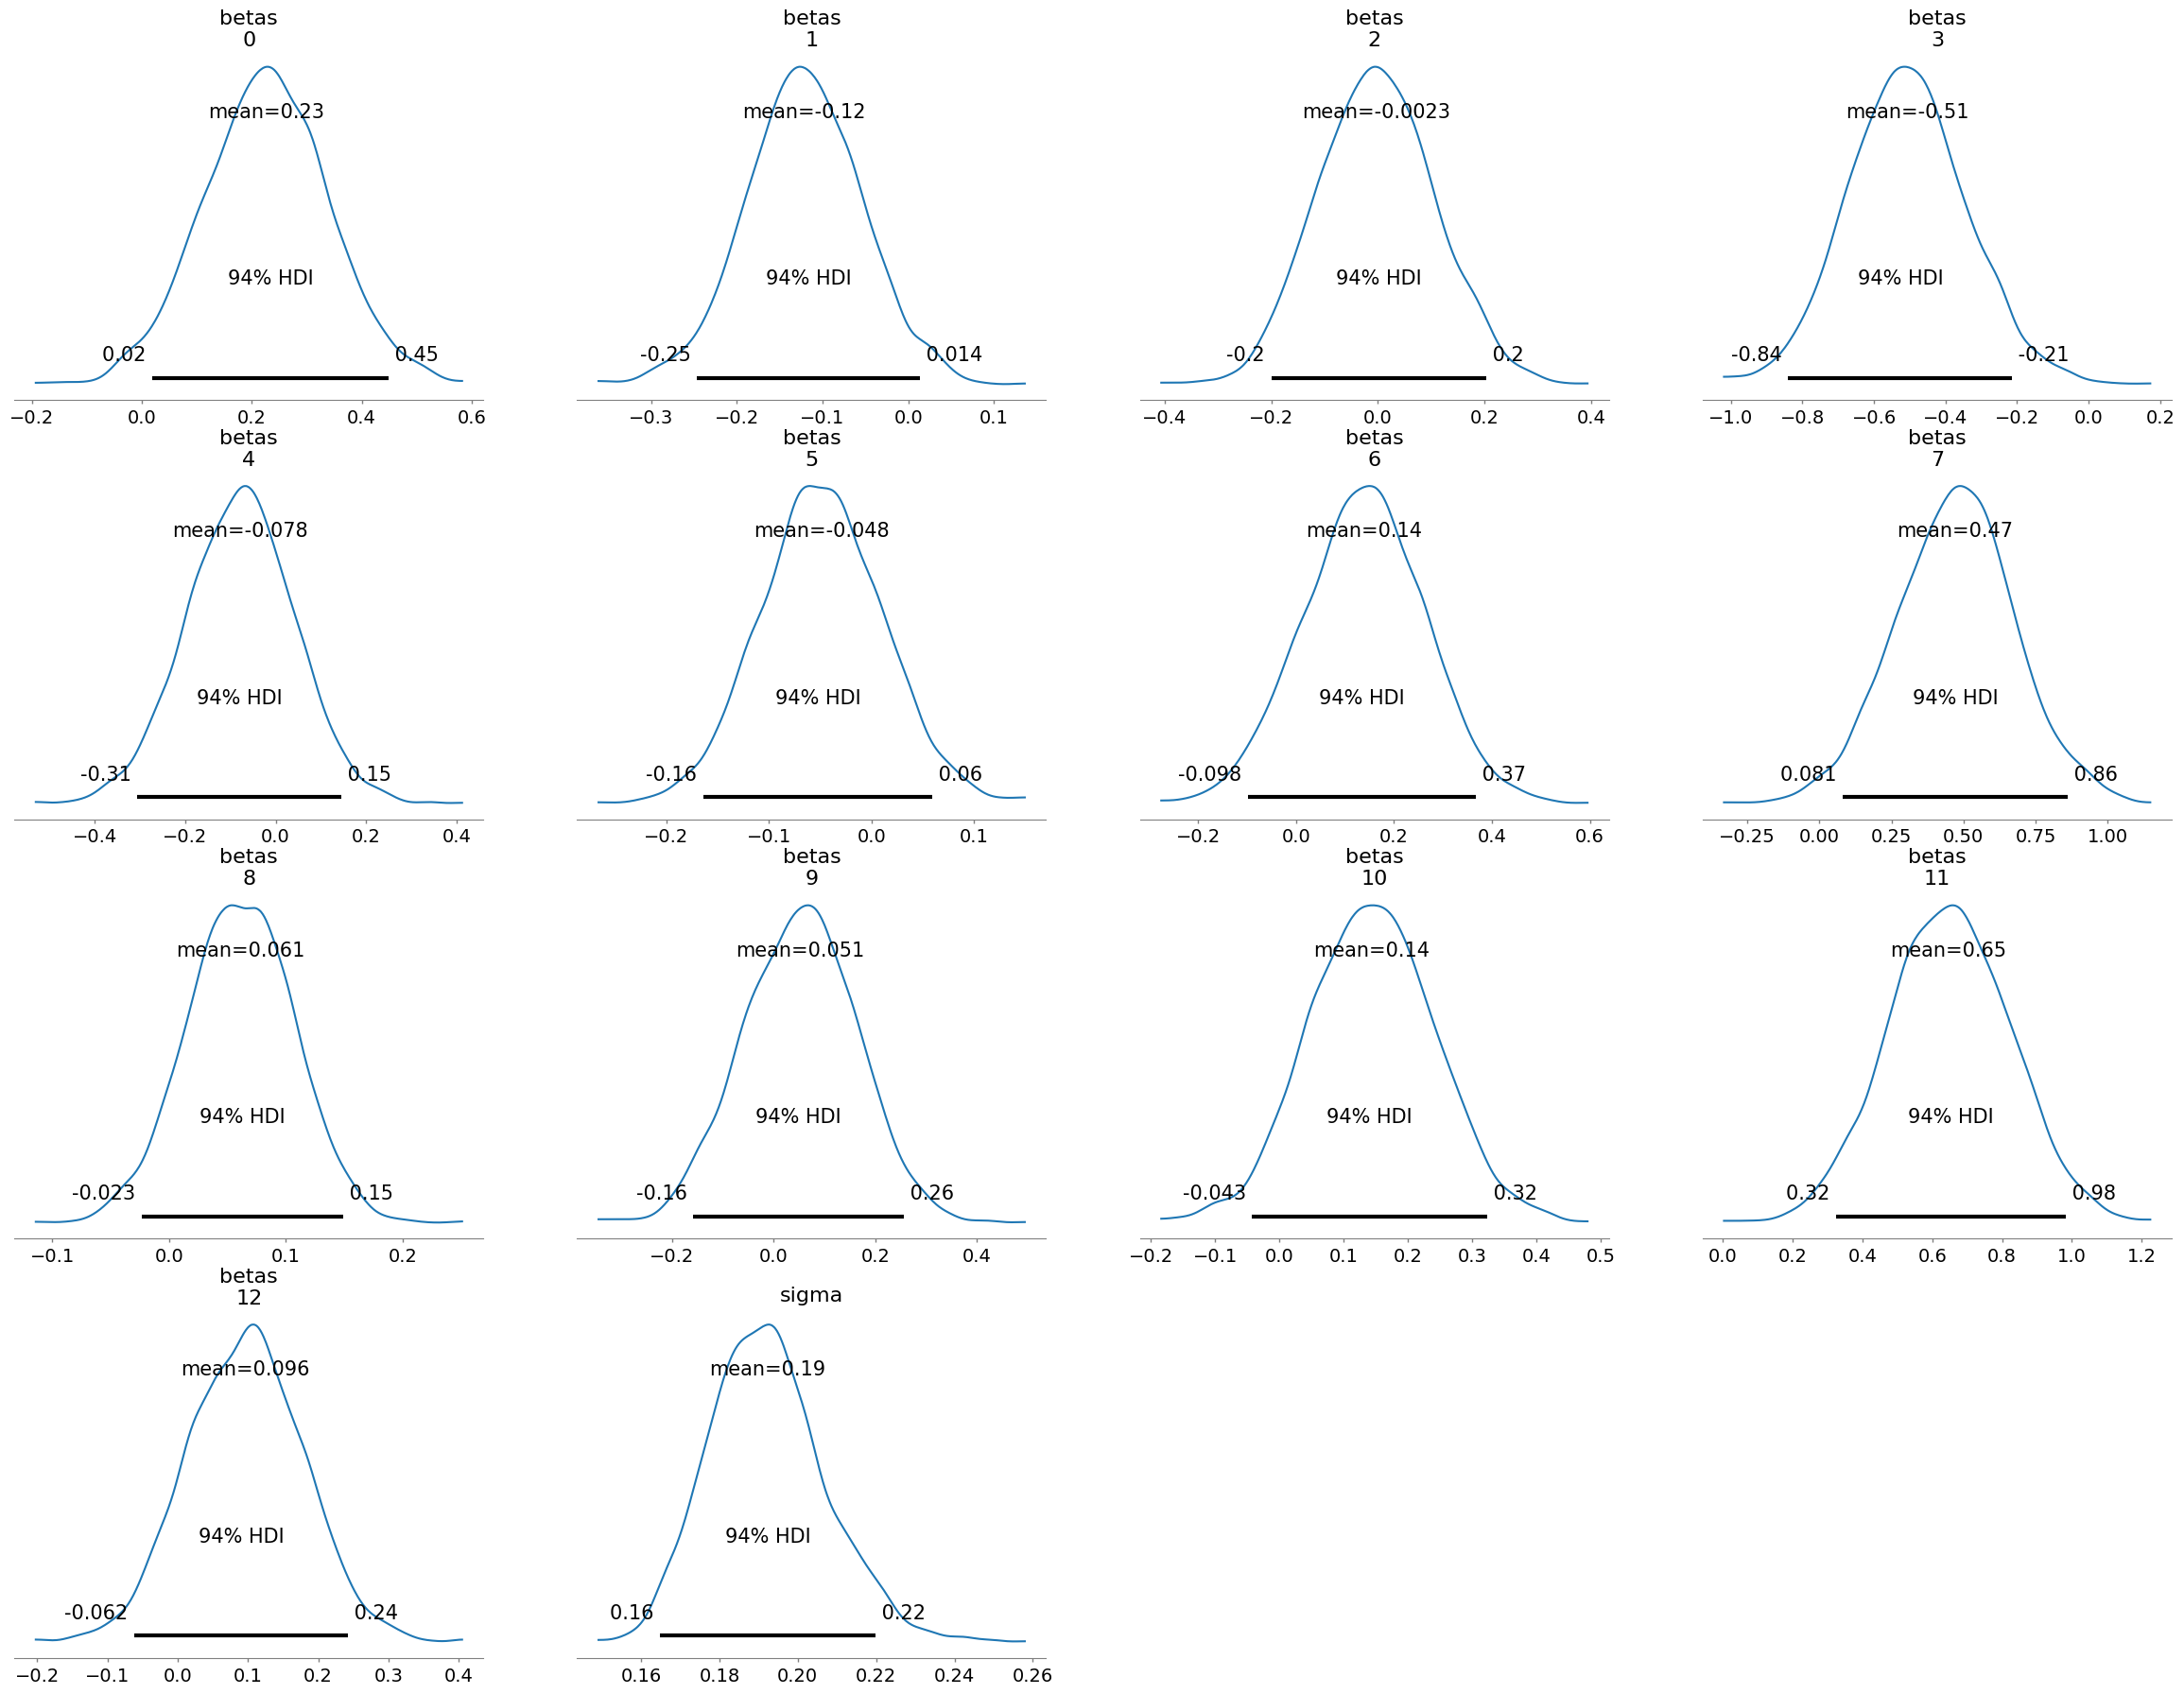

In [92]:
# Posterior analysis
az.plot_posterior(idata)

From a purely diagnostic standpoint, these MCMC outputs appear to exhibit excellent convergence and mixing properties. All of the \\(\hat R\\) values hover very close to 1.0, indicating that between‐chain variance does not substantially exceed within‐chain variance and that each parameter’s posterior draws have likely converged. The effective sample sizes (ESS) for both bulk and tail estimates are also quite high, often in the thousands, suggesting the Markov chains are efficiently exploring the posterior space and that the estimates of central tendency and tails should be reliable. Inspecting the trace plots, we see no obvious signs of nonstationary behavior, with each parameter chain fluctuating about a stable mean and showing no persistent trends or drifts. Furthermore, the overlay of posterior density curves shows unimodal distributions with smooth shapes, consistent with well‐mixed and converged chains. Finally, the close alignment among the different chains for \\(\sigma\\) underscores the stability of the variance estimate, all of which collectively support the conclusion that these MCMC runs are yielding robust and trustworthy posterior inferences.

#### [Optional] Q2 Extra: perform generalized Bayesian Linear Regression

Replace the residual distribution and use an appropriate link function

---

In [88]:
with pm.Model() as GLM:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    z = pm.Normal('z', mu=X_reduced@betas, sigma=1)
    y = pm.Bernoulli('y', p=pm.math.invprobit(X_reduced@betas), observed=y_reduced)
    
with GLM:
    idata2 = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, z]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 546 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [89]:
az.summary(idata2, round_to=5, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],-0.50989,0.92830,-2.34627,1.25526,0.02564,0.01370,1313.09606,2094.56953,1.00185
betas[1],-0.58901,0.84923,-2.35140,1.00102,0.03686,0.01931,536.20125,1114.65388,1.00515
betas[2],-0.69669,0.91496,-2.45122,1.08478,0.03432,0.01608,713.52462,1795.30901,1.00331
betas[3],-0.73824,0.90537,-2.57447,0.95406,0.02593,0.01395,1223.81992,2026.88096,1.00134
betas[4],-0.10672,0.91471,-1.96000,1.56335,0.02357,0.01230,1504.37777,2483.19420,1.00118
...,...,...,...,...,...,...,...,...,...
z[95],-3.87059,1.50858,-6.84955,-0.92605,0.09403,0.03020,259.72485,666.73585,1.00879
z[96],-2.86902,1.37588,-5.59122,-0.22046,0.07958,0.02528,302.90990,1002.00800,1.00499
z[97],-4.30207,1.56039,-7.39854,-1.40875,0.12422,0.05266,160.28058,282.86681,1.01735
z[98],-4.04050,1.45290,-6.86277,-1.22954,0.11189,0.04337,171.70321,320.05629,1.01715


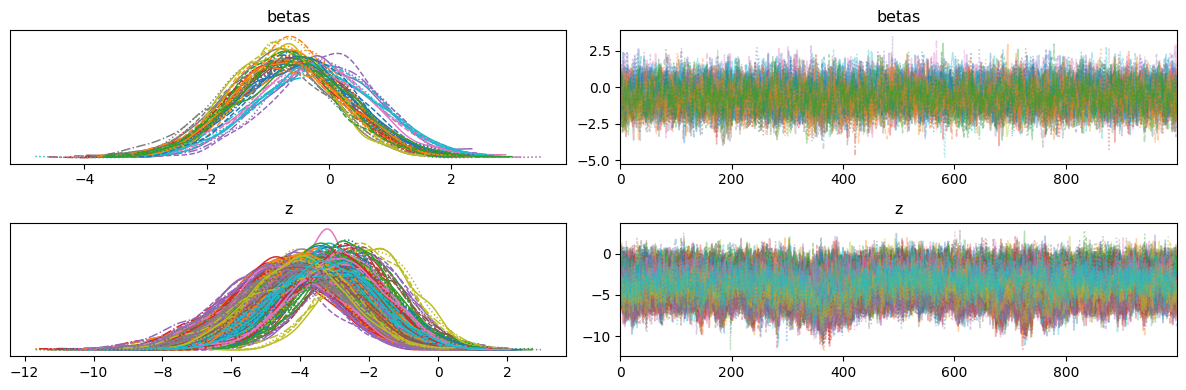

In [90]:
az.plot_trace(idata2)
plt.tight_layout()

c:\Users\81467\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\plots\plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (113) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'betas\n0'}>,
        <Axes: title={'center': 'betas\n1'}>,
        <Axes: title={'center': 'betas\n2'}>,
        <Axes: title={'center': 'betas\n3'}>],
       [<Axes: title={'center': 'betas\n4'}>,
        <Axes: title={'center': 'betas\n5'}>,
        <Axes: title={'center': 'betas\n6'}>,
        <Axes: title={'center': 'betas\n7'}>],
       [<Axes: title={'center': 'betas\n8'}>,
        <Axes: title={'center': 'betas\n9'}>,
        <Axes: title={'center': 'betas\n10'}>,
        <Axes: title={'center': 'betas\n11'}>],
       [<Axes: title={'center': 'betas\n12'}>,
        <Axes: title={'center': 'z\n0'}>,
        <Axes: title={'center': 'z\n1'}>,
        <Axes: title={'center': 'z\n2'}>],
       [<Axes: title={'center': 'z\n3'}>,
        <Axes: title={'center': 'z\n4'}>,
        <Axes: title={'center': 'z\n5'}>,
        <Axes: title={'center': 'z\n6'}>],
       [<Axes: title={'center': 'z\n7'}>,
        <Axes: title={'center': 'z\n8'}>,
        <Axes: t

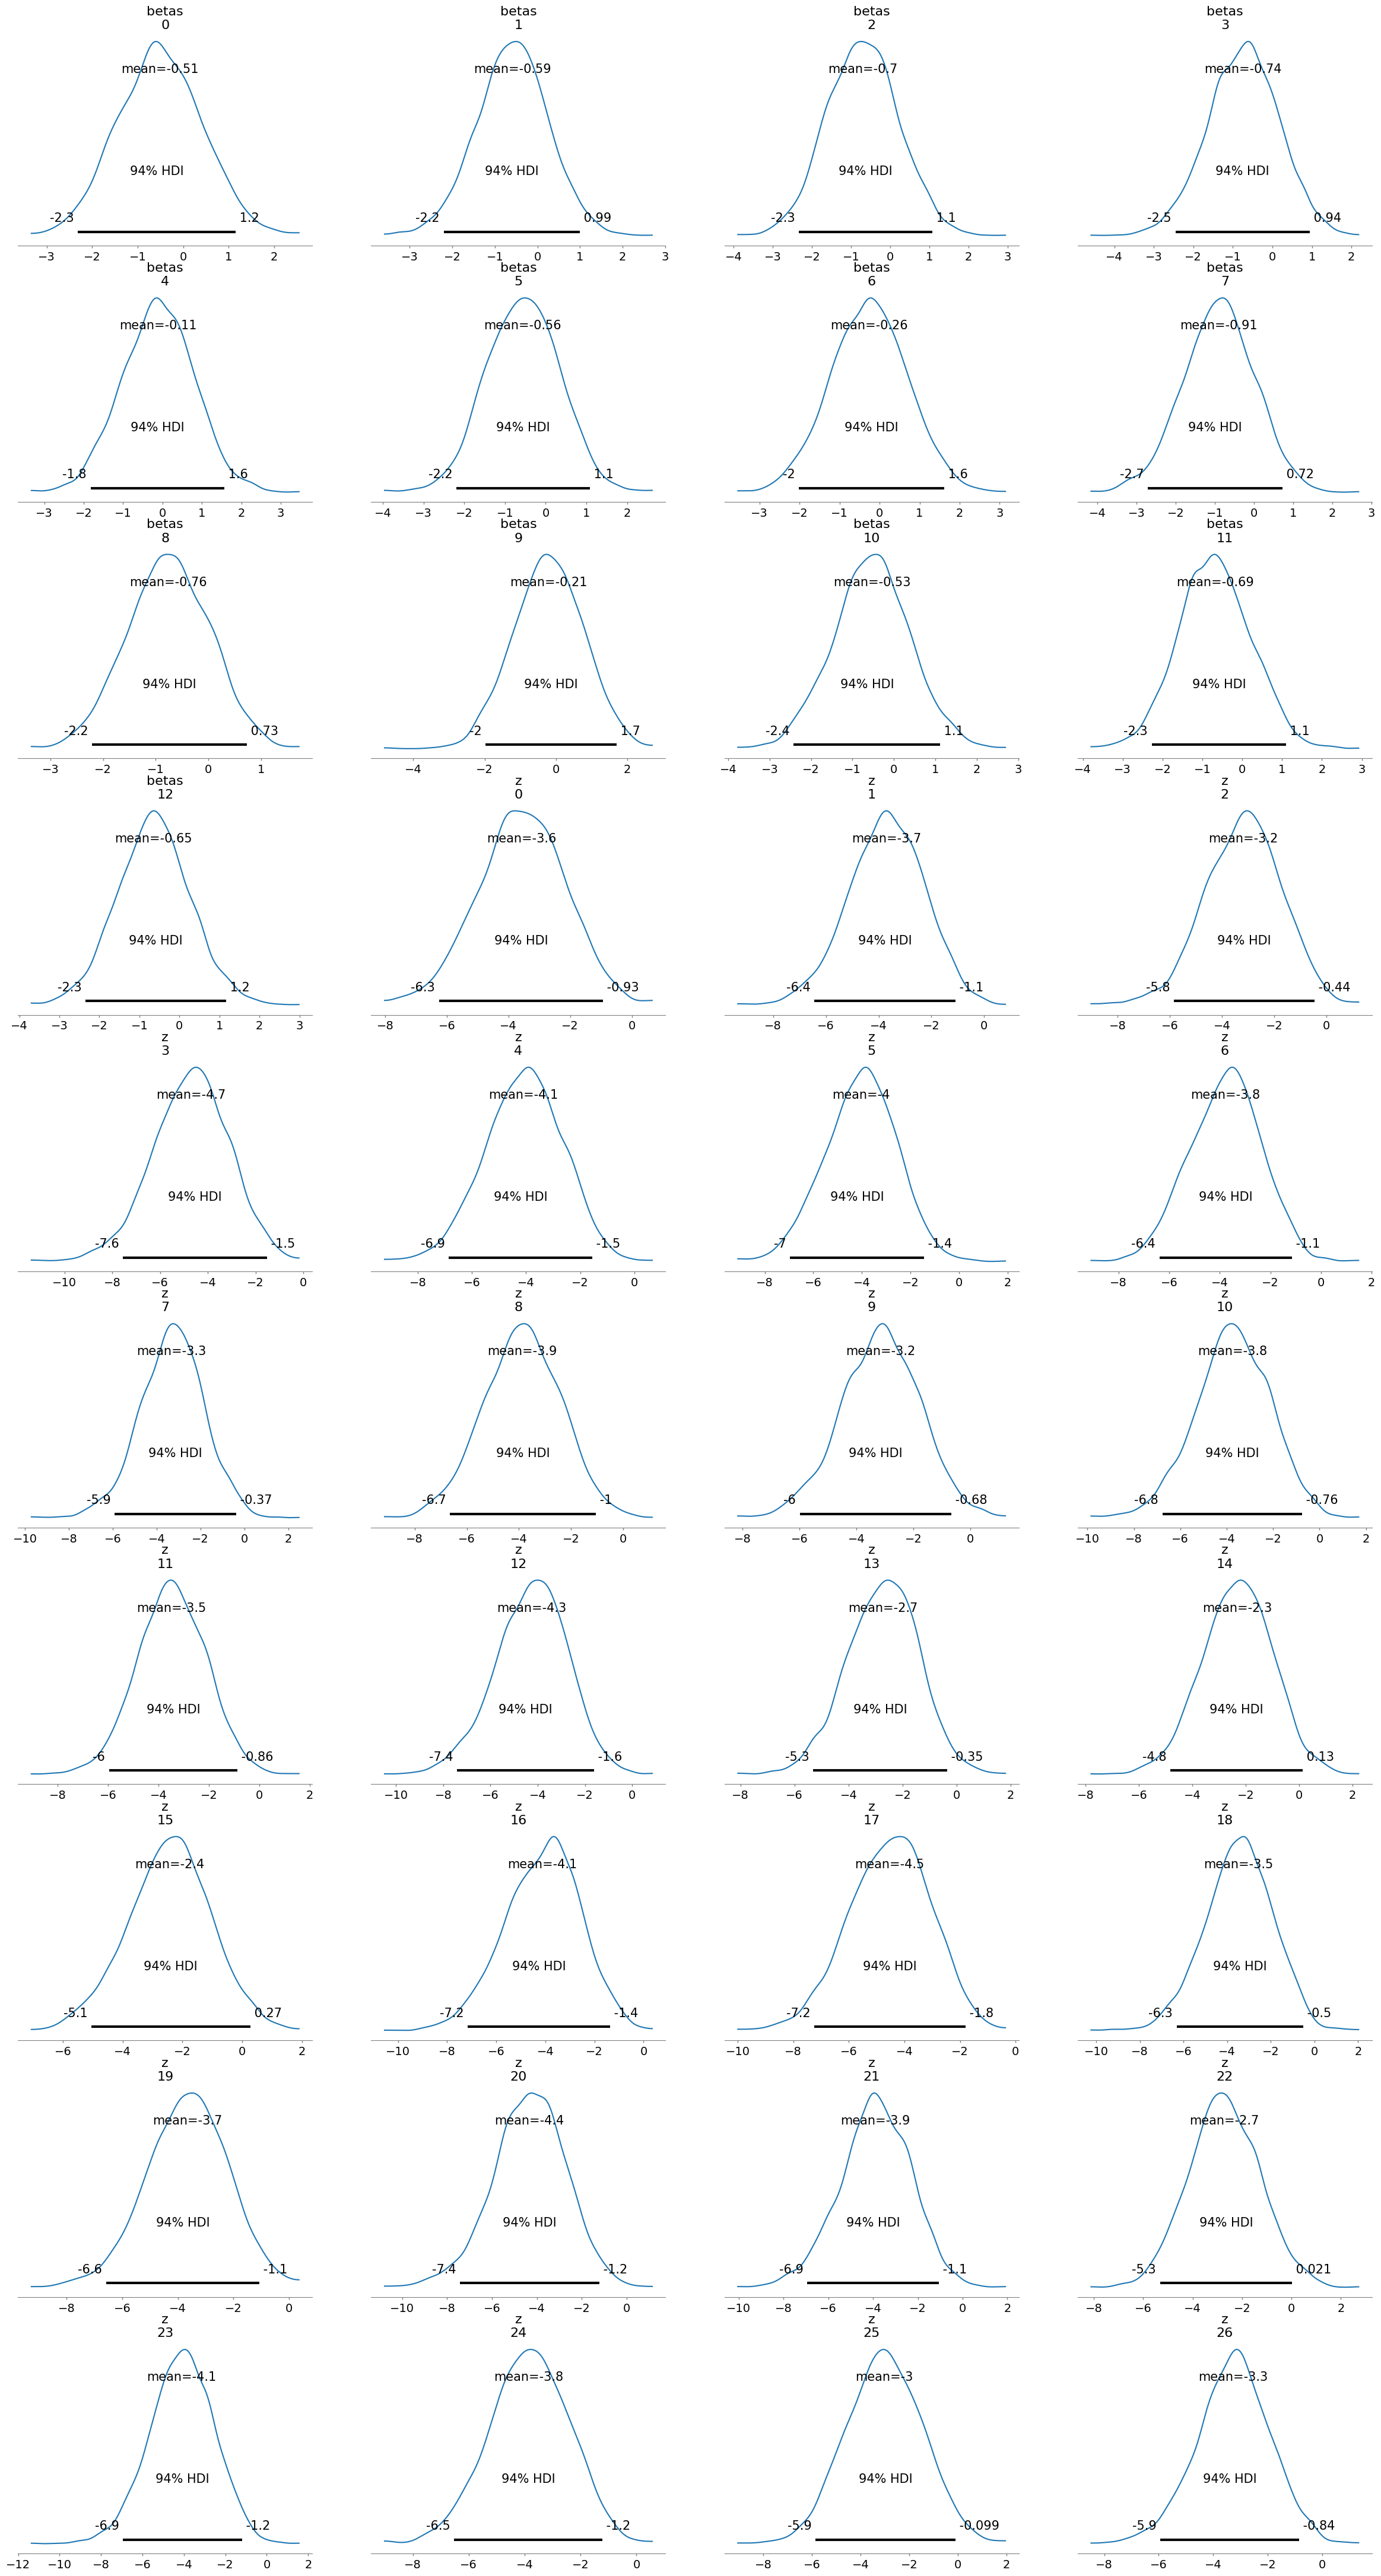

In [93]:
# Posterior analysis
az.plot_posterior(idata2)

### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$. 

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers" 
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

---

In [ ]:
np.random.seed(123)
n_y = len(y_reduced)
n_outliers = int(0.05 * n_y)  # 5% of data
outlier_indices = np.random.choice(n, size=n_outliers, replace=False)

# Add a large shift to these outlier points
y_outliers = y_reduced.copy()
y_outliers[outlier_indices] += 1000.0  # artificially large shift

# For convenience, we’ll treat y_outliers as the new 'observed' dataset
y_inclout = y_outliers

In [10]:
with pm.Model() as robust_model:
    # ------------------------------
    # 1) Priors on coefficients
    # ------------------------------
    p = X_reduced.shape[1]
    betas = pm.Normal('betas', mu=0.0, sigma=10.0, shape=p)

    # ------------------------------
    # 2) Prior for nu (degrees of freedom for the gamma) if we have enough data
    # ------------------------------
    nu = pm.Exponential('nu', lam=0.1)  
    # (Ensures nu > 0, center near small positive number, tune as needed)

    # ------------------------------
    # 3) Per-observation tau_i ~ Gamma(nu/2, nu/2)
    #    shape=(n,) means we get one tau_i for each data row
    # ------------------------------
    alpha_ = nu / 2.0
    beta_ = nu / 2.0
    tau_i = pm.Gamma('tau_i', alpha=alpha_, beta=beta_, shape=n)

    # ------------------------------
    # 4) Common precision or scale
    # ------------------------------
    tau = pm.HalfCauchy('tau', beta=1.0)

    # ------------------------------
    # 5) The linear predictor
    # ------------------------------
    mu = pm.math.dot(X_reduced, betas)  # shape (n,)

    # ------------------------------
    # 6) Observed data (likelihood)
    # ------------------------------
    # sigma_i = sqrt(1 / (tau_i * tau)) => 1 / sqrt(tau_i * tau)
    sigma_i = 1.0 / pm.math.sqrt(tau_i * tau)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma_i, observed=y_inclout)

with robust_model:
    idata3 = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, nu, tau_i, tau]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1291 seconds.
There were 48 divergences after tuning. Increase `target_accept` or reparameterize.


In [11]:
az.summary(idata3, round_to=5, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.08512,0.15620,-0.22905,0.37851,0.00485,0.00271,1037.16655,1839.65799,1.00136
betas[1],0.13701,0.10659,-0.06840,0.34868,0.00311,0.00210,1197.83715,1734.31686,1.00395
betas[2],-0.10563,0.14381,-0.40767,0.16940,0.00419,0.00233,1179.06118,1976.68977,1.00320
betas[3],-0.17671,0.16478,-0.51277,0.13301,0.00491,0.00326,1150.74537,1520.29592,1.00183
betas[4],0.01186,0.15503,-0.29310,0.32341,0.00517,0.00318,909.55855,1358.78764,1.00297
...,...,...,...,...,...,...,...,...,...
tau_i[96],2.00103,2.38560,0.00046,6.84932,0.04696,0.07693,1999.30947,1429.45129,1.00225
tau_i[97],0.57586,1.22798,0.00001,2.57354,0.02513,0.06228,1551.00039,2209.10791,1.00112
tau_i[98],1.17261,1.64123,0.00014,4.36241,0.02797,0.04947,1315.07037,1747.80548,1.00209
tau_i[99],0.16784,0.25894,0.00001,0.56927,0.00511,0.02493,1713.89400,1949.52205,1.00189


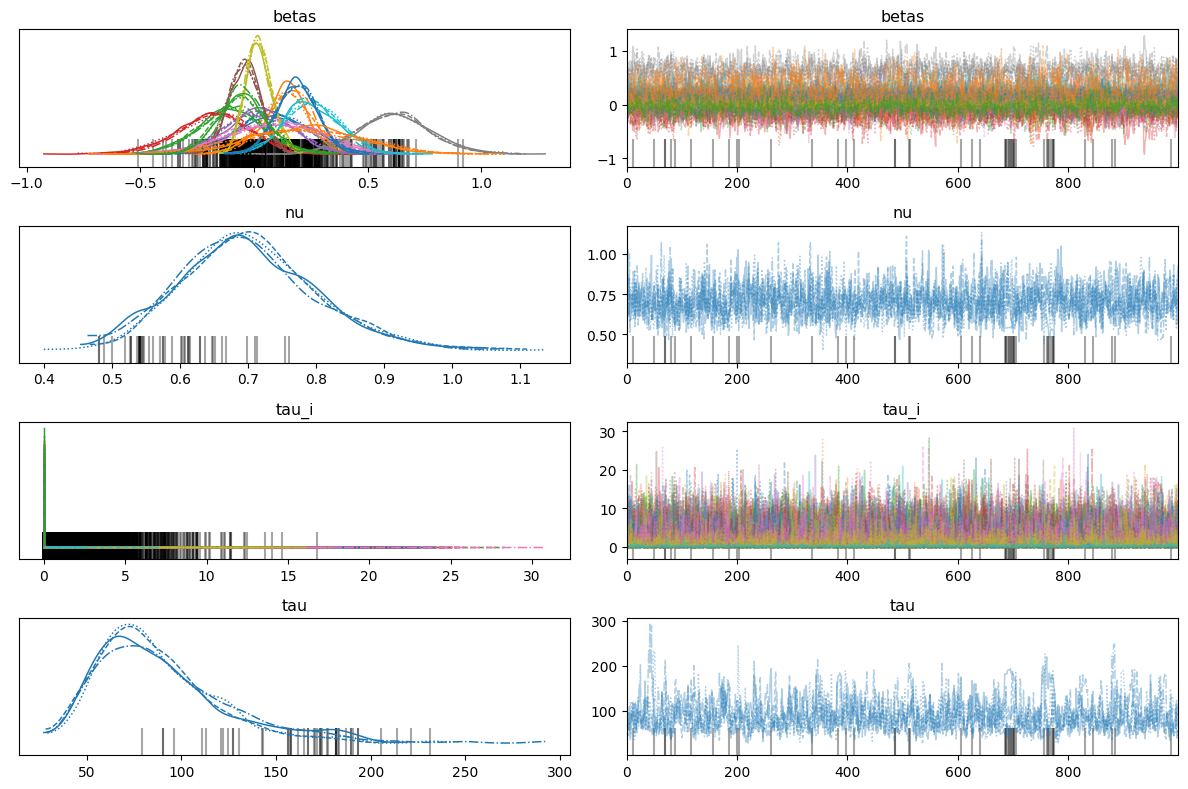

In [12]:
az.plot_trace(idata3)
plt.tight_layout()

<Axes: >

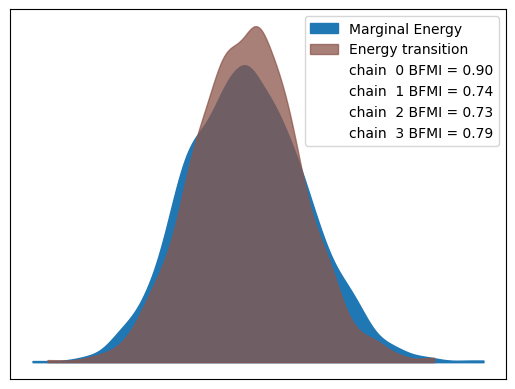

In [13]:
az.plot_energy(idata3)

The trace plots and summary statistics suggest that all parameters in this model have converged well, with \\(\hat R\\) values very close to 1.0 across the board and large effective sample sizes indicating good exploration of the posterior. The trace plots themselves do not show pathological trends or long‐range autocorrelation, and the posterior densities look reasonably unimodal and stable. The BFMI values (ranging from around 0.73 to 0.90 for the four chains) are comfortably above the usual rule‐of‐thumb threshold of about 0.3–0.4, which implies that the Hamiltonian trajectories are behaving efficiently and not exhibiting problematic energy transitions. The “energy” plot confirms that the distributions of marginal energy and transitions overlap meaningfully, reinforcing that the sampler’s momentum and posterior geometry are well matched. In short, these diagnostics provide strong evidence that the MCMC runs are convergent, mixing effectively, and therefore producing reliable posterior inferences for the parameters \\(\beta\\), \\(\nu\\), \\(\tau_i\\), and \\(\tau\\).

In [20]:
tau_i_post = idata3.posterior["tau_i"].mean(dim = ["chain", "draw"])
outliers_idx = set(np.argsort(tau_i_post)[:5].values)
false_index = set(outlier_indices)
error = outliers_idx.union(false_index) - outliers_idx.intersection(false_index)
print(f"Out of {n} observations, the false predicted indices are: {error}")
print(f"The percentage of error = {len(error)*100/n}%")

Out of 100 observations, the false predicted indices are: set()
The percentage of error = 0.0%


In [21]:
tau_post = idata3.posterior["tau"].mean(dim = ["chain", "draw"])
sigma2_post = 1/(tau_post.values * tau_i_post.values)

D = np.diag(sigma2_post)
H = X_reduced @ np.linalg.inv(X_reduced.T @ D @ X_reduced) @ X_reduced.T
diagonal = np.diag(H)

print(f"Influence of non-outlier = {diagonal[0]}")
print(f"Influence of outlier {diagonal[outlier_indices[1]]}")
print(f"Ratio = {diagonal[outlier_indices[0]]/diagonal[0]}")

Influence of non-outlier = 2.8987110121047026
Influence of outlier 1.9602172363231318e-06
Ratio = 6.849040477589217e-07


These results suggest that the model’s built‐in “robustness” is doing a good job of identifying and discounting the pre‐planted outliers. In this example, none of the observations were incorrectly classified relative to the known outliers, implying a 100% success rate in detecting them. Furthermore, the diagonal entries of the influence matrix reveal that outliers have a dramatically smaller weight compared to non‐outliers (the ratio on one outlier is on the order of 10^-7 relative to a typical non‐outlier). That tiny ratio underscores that the model effectively down‐weights outliers’ contribution to the fit, preventing them from exerting excessive leverage on the parameter estimates. Overall, these outputs confirm that the robust formulation is performing as intended by isolating aberrant points and limiting their influence.

#### [Optional] Q3 Extra: measurement error models?

What if $\textbf{x}_i = \textbf{x}_i^{true} + \eta_i, \eta_i \sim \mathcal{MVN}(\textbf{0}, \Sigma)$ for some kind of measurement error covariance structure $\Sigma$ and $\mathcal N (y_i| \textbf{X}^{true}\boldsymbol \beta, \sigma)$?

---